In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import requests 
import json 
% matplotlib inline
import os 
import datetime
import re

# Gathering Data

### Load Twitter archive data  

In [2]:
archive_df = pd.read_csv('raw_data/twitter-archive-enhanced.csv')

In [3]:
archive_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### download image prediction file 

In [4]:
url = ' https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open ('raw_data/image-predictions.tsv', 'wb') as file:
    file.write(response.content)

### Load image prediction file into pandas df 

In [5]:
image_predictions_df = pd.read_csv('raw_data/image-predictions.tsv', sep='\t')

In [6]:
image_predictions_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Download data by twitter api 

In [ ]:
#Authentication
consumer_key = ""
consumer_secret = ""
access_token = ""
access_secret = ""

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True) 

### Loading data from twitter api as json.txt

In [7]:
with open ('raw_data/tweet-json.txt', 'r') as file :
    json_df = pd.read_json(file, lines=True , encoding='utf-8')

In [8]:
json_df.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,0.0,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33819,False,This is Tilly. She's just checking pup on you....,NaN,...,0.0,NaN,NaN,NaN,6514,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25461,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,...,0.0,NaN,NaN,NaN,4328,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42908,False,This is Darla. She commenced a snooze mid meal...,NaN,...,0.0,NaN,NaN,NaN,8964,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,NaN,NaN,2017-07-29 16:00:24,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",41048,False,This is Franklin. He would like you to stop ca...,NaN,...,0.0,NaN,NaN,NaN,9774,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [80]:
json_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2354 non-null datetime64[ns]
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
geo                              0 non-null float64
id                               2354 non-null int64
id_str                           2354 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 n

In [81]:
json_df.dtypes

contributors                            float64
coordinates                             float64
created_at                       datetime64[ns]
display_text_range                       object
entities                                 object
extended_entities                        object
favorite_count                            int64
favorited                                  bool
full_text                                object
geo                                     float64
id                                        int64
id_str                                    int64
in_reply_to_screen_name                  object
in_reply_to_status_id                   float64
in_reply_to_status_id_str               float64
in_reply_to_user_id                     float64
in_reply_to_user_id_str                 float64
is_quote_status                            bool
lang                                     object
place                                    object
possibly_sensitive                      

# Assessing Data

### Twitter archive data in table 1

In [23]:
archive_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [26]:
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [11]:
archive_df.text.value_counts()

Meet Snoop. His number one passion is sticking his head out of car windows, so he purchased some doggles. Stylish af. 13/10 happy travels https://t.co/iHYfZdz444    1
Sneaky dog here. Tuba player has no clue. 10/10 super sneaky https://t.co/jWVwSppaa2                                                                                 1
This is Simba. He's the grand prize. The trophy is just for participation. 12/10 would pet so damn well https://t.co/4qiuC0lXq5                                      1
RT @dog_rates: This is Ken. His cheeks are magic. 13/10 (IG: ken_shiba) https://t.co/btzf1zTDeQ                                                                      1
This is Louis. He's a rollercoaster of emotions. Incalculably fluffy. 12/10 would pet firmly https://t.co/17RGvOZO9P                                                 1
This is Harrison. He braves the snow like a champ. Perched at all times. Hasn't blinked in months. 8/10 v nifty dog https://t.co/tiVuq6MNwl                          

In [28]:
sum(archive_df.duplicated())

0

In [29]:
sum(archive_df.tweet_id.duplicated())

0

In [30]:
sum(archive_df.expanded_urls.duplicated())

137

In [42]:
archive_df.expanded_urls.value_counts()

https://twitter.com/dog_rates/status/833124694597443584/photo/1,https://twitter.com/dog_rates/status/833124694597443584/photo/1,https://twitter.com/dog_rates/status/833124694597443584/photo/1                                                                                                              2
https://twitter.com/dog_rates/status/775733305207554048/photo/1                                                                                                                                                                                                                                              2
https://twitter.com/dog_rates/status/816450570814898180/photo/1,https://twitter.com/dog_rates/status/816450570814898180/photo/1                                                                                                                                                                              2
https://twitter.com/dog_rates/status/700747788515020802/photo/1                            

In [32]:
archive_df.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [39]:
archive_df[archive_df.rating_numerator <= 5 ]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883482846...,5,10,Bella,None,None,None,None
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835152434...,0,10,None,None,None,None,None
605,798576900688019456,NaN,NaN,2016-11-15 17:22:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Not familiar with this breed. N...,6.661041e+17,4.196984e+09,2015-11-16 04:02:55 +0000,https://twitter.com/dog_rates/status/666104133...,1,10,None,None,None,None,None
730,781661882474196992,NaN,NaN,2016-09-30 01:08:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Who keeps sending in pictures without dogs in ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/781661882...,5,10,None,None,None,None,None
765,777885040357281792,NaN,NaN,2016-09-19 15:00:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Wesley. He's clearly trespassing. Seem...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/777885040...,3,10,Wesley,None,None,None,None
883,760252756032651264,NaN,NaN,2016-08-01 23:15:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Fido. He can tell the weather. Not goo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/760252756...,4,10,Fido,None,None,None,None
912,757596066325864448,NaN,NaN,2016-07-25 15:19:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's another picture without a dog in it. Id...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/757596066...,4,10,None,None,None,None,None
956,751583847268179968,NaN,NaN,2016-07-09 01:08:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Please stop sending it pictures that don't eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/751583847...,5,10,None,doggo,None,pupper,None
1004,747816857231626240,NaN,NaN,2016-06-28 15:40:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Viewer discretion is advised. This is a terrib...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747816857...,4,10,a,None,None,None,None
1016,746906459439529985,7.468859e+17,4.196984e+09,2016-06-26 03:22:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...","PUPDATE: can't see any. Even if I could, I cou...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/746906459...,0,10,None,None,None,None,None


In [33]:
archive_df.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [41]:
archive_df[archive_df.rating_numerator <= 5 ].count()

tweet_id                      93
in_reply_to_status_id          7
in_reply_to_user_id            7
timestamp                     93
source                        93
text                          93
retweeted_status_id            2
retweeted_status_user_id       2
retweeted_status_timestamp     2
expanded_urls                 87
rating_numerator              93
rating_denominator            93
name                          93
doggo                         93
floofer                       93
pupper                        93
puppo                         93
dtype: int64

In [62]:
archive_df[['rating_numerator', 'rating_denominator']].describe()

,rating_numerator,rating_denominator
count,2356.000000,2356.000000
mean,13.126486,10.455433
std,45.876648,6.745237
min,0.000000,0.000000
25%,10.000000,10.000000
50%,11.000000,10.000000
75%,12.000000,10.000000
max,1776.000000,170.000000


In [36]:
archive_df.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver', 'Jim',
       'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Lilly',
       'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald',
       'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'a',
       'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack',
       'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow', 'Terrance', 'Aja',
       'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose',
       'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian', 'Walter', 'Sierra',
       'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover', 'Napolean', 'Dawn',
       'Boomer', 'Cody', 'Rumble', 'Clifford', 'quite', 'Dewey', 'Scout',
       'Gizmo', 'Cooper', 'Harold', 'Shikha', 'Jamesy', 'Lili', 'Sammy',
       'Meatball', 'Paisley', 'Albus', 'Neptune', '

In [37]:
archive_df.name.value_counts()

None        745
a            55
Charlie      12
Oliver       11
Cooper       11
Lucy         11
Tucker       10
Penny        10
Lola         10
Winston       9
Bo            9
Sadie         8
the           8
Buddy         7
Daisy         7
an            7
Bailey        7
Toby          7
Bella         6
Dave          6
Jax           6
Leo           6
Milo          6
Jack          6
Koda          6
Oscar         6
Rusty         6
Scout         6
Stanley       6
Oakley        5
           ... 
Shiloh        1
all           1
Holly         1
Lugan         1
Ike           1
Aubie         1
Tommy         1
Philippe      1
Mo            1
Donny         1
Josep         1
Durg          1
Amy           1
Alf           1
Ben           1
Billy         1
BeBe          1
Brandi        1
Eugene        1
Tanner        1
Arnold        1
Crimson       1
Aqua          1
Kane          1
Sandra        1
Jackie        1
Herb          1
Kuyu          1
Pete          1
Tassy         1
Name: name, Length: 957,

In [44]:
archive_df.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

### image predictions table 

In [9]:
image_predictions_df.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1317,755206590534418437,https://pbs.twimg.com/media/CnsIT0WWcAAul8V.jpg,1,web_site,0.906673,False,printer,0.008600,False,carton,0.004533,False
1887,847971574464610304,https://pbs.twimg.com/media/C8SZH1EWAAAIRRF.jpg,1,coffee_mug,0.633652,False,cup,0.273392,False,toilet_tissue,0.066656,False
207,669942763794931712,https://pbs.twimg.com/media/CUwdYL5UsAAP0XX.jpg,1,vizsla,0.743216,True,redbone,0.217282,True,Rhodesian_ridgeback,0.028473,True
802,691459709405118465,https://pbs.twimg.com/media/CZiO7mWUEAAa4zo.jpg,1,Shetland_sheepdog,0.551206,True,collie,0.232544,True,Border_collie,0.095218,True
948,704819833553219584,https://pbs.twimg.com/media/CcgF5ovW8AACrEU.jpg,1,guinea_pig,0.994776,False,hamster,0.004069,False,wood_rabbit,0.000206,False
726,686358356425093120,https://pbs.twimg.com/media/CYZvRttWYAE_RXc.jpg,1,pug,0.985237,True,bull_mastiff,0.008841,True,boxer,0.002321,True
630,680934982542561280,https://pbs.twimg.com/media/CXMqwIQWcAA2iE0.jpg,1,Labrador_retriever,0.784398,True,Siberian_husky,0.055925,True,beagle,0.022750,True
751,688064179421470721,https://pbs.twimg.com/media/CYx-tGaUoAAEXV8.jpg,1,Eskimo_dog,0.240602,True,Norwegian_elkhound,0.180369,True,Siberian_husky,0.090739,True
528,676776431406465024,https://pbs.twimg.com/ext_tw_video_thumb/67677...,1,doormat,0.201346,False,dishwasher,0.191749,False,microwave,0.038110,False
97,667728196545200128,https://pbs.twimg.com/media/CUQ_QahUAAAVQjn.jpg,1,kuvasz,0.360159,True,golden_retriever,0.293744,True,Labrador_retriever,0.270673,True


In [60]:
image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [61]:
sum(image_predictions_df.duplicated())

0

In [62]:
sum(image_predictions_df.tweet_id.duplicated())

0

In [63]:
sum(image_predictions_df.jpg_url.duplicated())

66

In [50]:
image_predictions_df.jpg_url.value_counts()

https://pbs.twimg.com/media/Ct2qO5PXEAE6eB0.jpg                                            2
https://pbs.twimg.com/media/C2kzTGxWEAEOpPL.jpg                                            2
https://pbs.twimg.com/media/Ck2d7tJWUAEPTL3.jpg                                            2
https://pbs.twimg.com/media/CZhn-QAWwAASQan.jpg                                            2
https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg                                            2
https://pbs.twimg.com/media/CsVO7ljW8AAckRD.jpg                                            2
https://pbs.twimg.com/media/CmoPdmHW8AAi8BI.jpg                                            2
https://pbs.twimg.com/media/CU3mITUWIAAfyQS.jpg                                            2
https://pbs.twimg.com/media/C12x-JTVIAAzdfl.jpg                                            2
https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg                                            2
https://pbs.twimg.com/media/Cveg1-NXgAASaaT.jpg                       

In [57]:
image_predictions_df.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [73]:
image_predictions_df.dtypes

tweet_id      int64
jpg_url      object
img_num       int64
p1           object
p1_conf     float64
p1_dog         bool
p2           object
p2_conf     float64
p2_dog         bool
p3           object
p3_conf     float64
p3_dog         bool
dtype: object

In [65]:
sum(image_predictions_df.p1_conf.duplicated())

69

In [10]:
columns_to_check = ["p1","p1_conf","p1_dog","p2","p2_conf","p2_dog","p3","p3_conf","p3_dog"]
for column in columns_to_check:
    print(sum(image_predictions_df[columns_to_check].duplicated()))

66
66
66
66
66
66
66
66
66


### Tweets Api Data 

In [82]:
json_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2354 non-null datetime64[ns]
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
geo                              0 non-null float64
id                               2354 non-null int64
id_str                           2354 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 n

In [83]:
sum(json_df.id.duplicated())

0

# General Observations

### Quality 

- 'timestamp' column is a string instead of date time 
- 'rating_numerator' column is an integer type , it should be float
- 'rating_numerator' has illogical values that should be deleted   
- 'rating_denominator' has values more and less than 10 , that should be removed 
- 'expanded_url' has empty values that should be deleted 
- 'in expanded_url' some raws contain the value twice separating by commas
- 'expanded_urls' column have some duplicated data 
- Remove the retweets columns from the data table as we don't need them for analysing 
- Remove the reply to(S) columns from the data table as we don't need them for analysing 
- 'source' column has "<'/a'>" that should be removed 
- 'id' column in the json text file inconsistence with the other 2 column with 'tweet_id'
- 'name' column has 'none' values instead of 'nan'and many weird values
- doggo, floofer, pupper and puppo columns have 'none' as missing values instead of nan 
- The column img_num does not have a clear purpose so it should be removed 

### Tidiness

- doggo, floofer, pupper and puppo  columns can be merged into 1 column 
- in the api data we just need 3 columns (id, retweet_count, favourite_count)
- columns (p1 ,p1_conf ,p1_dog,p2,p2_conf ,p2_dog ,p3 ,p3_conf ,p3_dog) should be merged in 2 columns (image_pred, confidence)
- all data tables should be combined into 1 table

# Cleaning 

###  make a copy of our data tables 

In [8]:
archive_df_cleaned = archive_df.copy()
json_df_cleaned = json_df.copy()
image_predictions_df_clean = image_predictions_df.copy()

### Define 
- convert 'timestamp' column from string to datetime 

### Code

In [9]:
archive_df_cleaned['timestamp'] = pd.to_datetime(archive_df_cleaned.timestamp)

### Test 

In [65]:
archive_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](1

### Define

- Convert 'rating_numerator' column from integer to float 

### Code

In [10]:
archive_df_cleaned['rating_numerator']= archive_df_cleaned['rating_numerator'].astype(float)

### Test

In [67]:
archive_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null float64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns]

### Define

- Remove 'rating_denominator' values that less or more than 10

### Code

In [11]:
archive_df_cleaned = archive_df_cleaned[archive_df_cleaned['rating_denominator'] == 10 ]

### Test 

In [69]:
archive_df_cleaned[['rating_numerator', 'rating_denominator']].describe()

,rating_numerator,rating_denominator
count,2333.000000,2333.0
mean,12.237462,10.0
std,41.022472,0.0
min,0.000000,10.0
25%,10.000000,10.0
50%,11.000000,10.0
75%,12.000000,10.0
max,1776.000000,10.0


### Define

- removing illogical values in 'rating_numeratot' column 

### Code 

In [12]:
archive_df_cleaned = archive_df_cleaned[(archive_df_cleaned['rating_numerator'] < 20 )
                                       & (archive_df_cleaned['rating_numerator']> 1) ]

### Test

In [14]:
archive_df_cleaned[['rating_numerator', 'rating_denominator']].describe()

,rating_numerator,rating_denominator
count,2314.000000,2314.0
mean,10.749784,10.0
std,2.084481,0.0
min,2.000000,10.0
25%,10.000000,10.0
50%,11.000000,10.0
75%,12.000000,10.0
max,17.000000,10.0


### Define

- Deleting the empty values in expanded_url column 

### Code

In [13]:
archive_df_cleaned['expanded_urls'].dropna(how='all', inplace= True)

In [14]:
sum(archive_df_cleaned['expanded_urls'] == "")

0

# Test 

In [74]:
archive_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2314 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2314 non-null int64
in_reply_to_status_id         66 non-null float64
in_reply_to_user_id           66 non-null float64
timestamp                     2314 non-null datetime64[ns]
source                        2314 non-null object
text                          2314 non-null object
retweeted_status_id           178 non-null float64
retweeted_status_user_id      178 non-null float64
retweeted_status_timestamp    178 non-null object
expanded_urls                 2265 non-null object
rating_numerator              2314 non-null float64
rating_denominator            2314 non-null int64
name                          2314 non-null object
doggo                         2314 non-null object
floofer                       2314 non-null object
pupper                        2314 non-null object
puppo                         2314 non-null object
dtypes: datetime64[ns]

### Define

- Deleting raws in 'expanded_urls' that have same values twice separated by commas

### Code

In [15]:
archive_df_cleaned['expanded_urls_cleaned'] = archive_df_cleaned.expanded_urls.str.split(',').str[0]
archive_df_cleaned.drop('expanded_urls', axis = 1, inplace=True)
archive_df_cleaned.rename(columns={'expanded_urls_cleaned':'expanded_url'}, inplace=True)

### Test

In [98]:
archive_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2314 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2314 non-null int64
in_reply_to_status_id         66 non-null float64
in_reply_to_user_id           66 non-null float64
timestamp                     2314 non-null datetime64[ns]
source                        2314 non-null object
text                          2314 non-null object
retweeted_status_id           178 non-null float64
retweeted_status_user_id      178 non-null float64
retweeted_status_timestamp    178 non-null object
rating_numerator              2314 non-null float64
rating_denominator            2314 non-null int64
name                          2314 non-null object
doggo                         2314 non-null object
floofer                       2314 non-null object
pupper                        2314 non-null object
puppo                         2314 non-null object
expanded_url                  2265 non-null object
dtypes: datetime64[ns]

In [103]:
archive_df_cleaned.expanded_url.value_counts()

https://twitter.com/dog_rates/status/750719632563142656/photo/1    2
https://twitter.com/dog_rates/status/732005617171337216/photo/1    2
https://twitter.com/dog_rates/status/739979191639244800/photo/1    2
https://vine.co/v/5W2Dg3XPX7a                                      2
https://twitter.com/dog_rates/status/742423170473463808/photo/1    2
https://twitter.com/dog_rates/status/771770456517009408/photo/1    2
https://twitter.com/dog_rates/status/786233965241827333/photo/1    2
https://twitter.com/dog_rates/status/679828447187857408/photo/1    2
https://www.gofundme.com/lolas-life-saving-surgery-funds           2
https://twitter.com/dog_rates/status/707610948723478529/photo/1    2
https://twitter.com/dog_rates/status/761004547850530816/photo/1    2
https://twitter.com/dog_rates/status/790946055508652032/photo/1    2
https://vine.co/v/ea0OwvPTx9l                                      2
https://www.gofundme.com/3yd6y1c                                   2
https://twitter.com/dog_rates/stat

### Define

- Deleting diplicated raws in expanded_url column 

### Code

In [16]:
archive_df_cleaned.drop_duplicates('expanded_url', inplace = True)

### Test

In [105]:
sum(archive_df_cleaned.duplicated('expanded_url'))

0

In [106]:
archive_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2112 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2112 non-null int64
in_reply_to_status_id         22 non-null float64
in_reply_to_user_id           22 non-null float64
timestamp                     2112 non-null datetime64[ns]
source                        2112 non-null object
text                          2112 non-null object
retweeted_status_id           177 non-null float64
retweeted_status_user_id      177 non-null float64
retweeted_status_timestamp    177 non-null object
rating_numerator              2112 non-null float64
rating_denominator            2112 non-null int64
name                          2112 non-null object
doggo                         2112 non-null object
floofer                       2112 non-null object
pupper                        2112 non-null object
puppo                         2112 non-null object
expanded_url                  2111 non-null object
dtypes: datetime64[ns]

### Define 

- Removing the (retweeted_status_id ,retweeted_status_user_id ,retweeted_status_timestamp) 

### Code

In [17]:
columns_dropped = ["retweeted_status_id", "retweeted_status_user_id", "retweeted_status_timestamp"]
archive_df_cleaned.drop(columns_dropped, axis = 1 , inplace = True)

### Test

In [108]:
archive_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2112 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2112 non-null int64
in_reply_to_status_id    22 non-null float64
in_reply_to_user_id      22 non-null float64
timestamp                2112 non-null datetime64[ns]
source                   2112 non-null object
text                     2112 non-null object
rating_numerator         2112 non-null float64
rating_denominator       2112 non-null int64
name                     2112 non-null object
doggo                    2112 non-null object
floofer                  2112 non-null object
pupper                   2112 non-null object
puppo                    2112 non-null object
expanded_url             2111 non-null object
dtypes: datetime64[ns](1), float64(3), int64(2), object(8)
memory usage: 247.5+ KB


### Define

- deleting (in_reply_to_status_id ,in_reply_to_user_id) as they're not usefull 

### Code

In [18]:
reply_dropped = ["in_reply_to_status_id", "in_reply_to_user_id"]
archive_df_cleaned.drop(reply_dropped,axis = 1,  inplace= True)

### Test

In [111]:
archive_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2112 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2112 non-null int64
timestamp             2112 non-null datetime64[ns]
source                2112 non-null object
text                  2112 non-null object
rating_numerator      2112 non-null float64
rating_denominator    2112 non-null int64
name                  2112 non-null object
doggo                 2112 non-null object
floofer               2112 non-null object
pupper                2112 non-null object
puppo                 2112 non-null object
expanded_url          2111 non-null object
dtypes: datetime64[ns](1), float64(1), int64(2), object(8)
memory usage: 294.5+ KB


### Define


- removing the "<'/a'>" in source column 

### Code

In [19]:
archive_df_cleaned.source.unique()

array([ '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'], dtype=object)

In [20]:
def remove_tag(x):
    # x is the html tag in the source column in archive_df data 
    #find the first closed tag '>'
    a = x.find('>')+1
    #find the first open tag '<'
    b = x[a:].find('<')
    # remove the text in between
    return x[a:][:b]

In [21]:
archive_df_cleaned.source = archive_df_cleaned.source.apply(lambda x: remove_tag(x))

### Test

In [83]:
archive_df_cleaned.source.unique()

array(['Twitter for iPhone', 'Twitter Web Client', 'Vine - Make a Scene',
       'TweetDeck'], dtype=object)

In [27]:
archive_df_cleaned.source.value_counts()

Twitter for iPhone     1996
Vine - Make a Scene      78
Twitter Web Client       29
TweetDeck                 9
Name: source, dtype: int64

### Define

- Converting the 'id' column in the jason-text data into 'tweet_id' for consistency (Quality) & remove the unnecessery columns in the dataset (Tidiness)
 

### Code

In [22]:
df_list = []

with open('raw_data/tweet-json.txt', 'r') as file:
    for line in file:
        tweet = json.loads(line)
        tweet_id = tweet['id']
        retweet_count = tweet['retweet_count']
        fav_count = tweet['favorite_count']
        df_list.append({'tweet_id':tweet_id,
                       'retweet_count': retweet_count,
                       'favorite_count': fav_count})
        
api_df = pd.DataFrame(df_list)


### Test 

In [102]:
api_df.head()

,favorite_count,retweet_count,tweet_id
0,39467,8853,892420643555336193
1,33819,6514,892177421306343426
2,25461,4328,891815181378084864
3,42908,8964,891689557279858688
4,41048,9774,891327558926688256


### Define

- Replace the none values in 'name' column with nan , and removing all weired values 

### Code


In [23]:
archive_df_cleaned[~archive_df_cleaned.name.str.istitle()].name.unique()

array(['such', 'a', 'quite', 'not', 'one', 'incredibly', 'BeBe', 'mad',
       'an', 'very', 'just', 'DonDon', 'my', 'his', 'actually', 'getting',
       'unacceptable', 'all', 'old', 'infuriating', 'CeCe', 'the', 'by',
       'officially', 'life', 'light', 'space', 'JD', 'DayZ'], dtype=object)

In [24]:
archive_df_cleaned.name.replace(['such', 'a', 'quite', 'not', 'one', 'incredibly', 'BeBe', 'mad',
       'an', 'very', 'just', 'DonDon', 'my', 'his', 'actually', 'getting',
       'unacceptable', 'all', 'old', 'infuriating', 'CeCe', 'the', 'by',
       'officially', 'life', 'light', 'space', 'JD', 'DayZ', 'None'], np.nan, inplace =True)

### Test

In [88]:
archive_df_cleaned.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', nan, 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver', 'Jim',
       'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'Maya', 'Mingus',
       'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Lilly', 'Earl',
       'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald', 'Rusty',
       'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'Elliot', 'Louis',
       'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack', 'Emmy', 'Steven',
       'Beau', 'Snoopy', 'Shadow', 'Terrance', 'Aja', 'Penny', 'Dante',
       'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget', 'Cash',
       'Coco', 'Jed', 'Sebastian', 'Walter', 'Sierra', 'Monkey', 'Harry',
       'Kody', 'Lassie', 'Rover', 'Napolean', 'Dawn', 'Boomer', 'Cody',
       'Rumble', 'Clifford', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold',
       'Shikha', 'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Neptune', 'Quinn', 'Belle', 'Zooey',

### Define

- Replace none in (doggo, floofer, pupper and puppo)columns with nan 

### Code

In [25]:
dog_name_list = ['doggo', 'floofer', 'pupper', 'puppo']
for dog_name in dog_name_list:
    archive_df_cleaned[dog_name]= archive_df_cleaned[dog_name].replace('None', np.nan)

### Test

In [36]:
archive_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2112 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2112 non-null int64
timestamp             2112 non-null datetime64[ns]
source                2112 non-null object
text                  2112 non-null object
rating_numerator      2112 non-null float64
rating_denominator    2112 non-null int64
name                  1380 non-null object
doggo                 84 non-null object
floofer               10 non-null object
pupper                235 non-null object
puppo                 24 non-null object
expanded_url          2111 non-null object
dtypes: datetime64[ns](1), float64(1), int64(2), object(8)
memory usage: 214.5+ KB


### Define

- removing the img_num column as we don't need it in the analysing process 

### Code

In [26]:
image_predictions_df_clean.drop('img_num', axis=1 , inplace=True)

### Test

In [91]:
image_predictions_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 11 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(4)
memory usage: 135.8+ KB


### Define

- merge the (doggo, floofer, pupper and puppo ) columns into 1 column (dog_stage)

### Code

In [27]:
columns = ['doggo', 'floofer', 'pupper', 'puppo']
# creat the dog_stage column and put the 4 columns on it 
archive_df_cleaned['dog_stage']= archive_df_cleaned[columns].apply(lambda x: ', '.join(x.dropna().astype(str)), axis= 1)
archive_df_cleaned['dog_stage']= archive_df_cleaned.dog_stage.replace('', np.nan).astype('category')


In [28]:
archive_df_cleaned= archive_df_cleaned.drop(columns, axis= 1)

### Test

In [141]:
archive_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2112 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2112 non-null int64
timestamp             2112 non-null datetime64[ns]
source                2112 non-null object
text                  2112 non-null object
rating_numerator      2112 non-null float64
rating_denominator    2112 non-null int64
name                  1380 non-null object
expanded_url          2111 non-null object
dog_stage             341 non-null category
dtypes: category(1), datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 150.9+ KB


In [142]:
archive_df_cleaned.dog_stage.value_counts()

pupper            225
doggo              72
puppo              23
doggo, pupper      10
floofer             9
doggo, puppo        1
doggo, floofer      1
Name: dog_stage, dtype: int64

### Define

- create (image_pred, confidence) columns from (p1 ,p1_conf ,p1_dog,p2,p2_conf ,p2_dog ,p3 ,p3_conf ,p3_dog) columns 

### Code

In [29]:
image_pred = []
confidence = []
for index, row in image_predictions_df_clean.iterrows():
    if row['p1_dog']and row['p1_conf'] == max([row['p1_conf'], row['p2_conf'], row['p3_conf']]):
        image_pred.append(row['p1'])
        confidence.append(row['p1_conf'])
    elif row['p2_dog']and row['p2_conf'] == max([row['p1_conf'], row['p2_conf'], row['p3_conf']]):
        image_pred.append(row['p2'])
        confidence.append(row['p2_conf'])   
    elif row['p3_dog']and row['p3_conf'] == max([row['p1_conf'], row['p2_conf'], row['p3_conf']]):
        image_pred.append(row['p3'])
        confidence.append(row['p3_conf'])
    else:
        image_pred.append(np.nan)
        confidence.append(np.nan)
        
image_predictions_df_clean['image_pred']= image_pred
image_predictions_df_clean['confidence']= confidence
    

In [30]:
image_predictions_df_clean = image_predictions_df_clean[['tweet_id', 'jpg_url', 'image_pred', 'confidence']]

### Test

In [99]:
image_predictions_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 4 columns):
tweet_id      2075 non-null int64
jpg_url       2075 non-null object
image_pred    1532 non-null object
confidence    1532 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 64.9+ KB


In [100]:
image_predictions_df_clean.head(7)

,tweet_id,jpg_url,image_pred,confidence
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,0.560311
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,Bernese_mountain_dog,0.651137
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,NaN,NaN


### Define

- Combining all 3 tables in a single table data set 

### Code

In [31]:
df = pd.merge(archive_df_cleaned, image_predictions_df_clean, on = 'tweet_id')
df = pd.merge(df, api_df, on= 'tweet_id')

### Test

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1903 entries, 0 to 1902
Data columns (total 14 columns):
tweet_id              1903 non-null int64
timestamp             1903 non-null datetime64[ns]
source                1903 non-null object
text                  1903 non-null object
rating_numerator      1903 non-null float64
rating_denominator    1903 non-null int64
name                  1280 non-null object
expanded_url          1903 non-null object
dog_stage             290 non-null category
jpg_url               1903 non-null object
image_pred            1403 non-null object
confidence            1403 non-null float64
favorite_count        1903 non-null int64
retweet_count         1903 non-null int64
dtypes: category(1), datetime64[ns](1), float64(2), int64(4), object(6)
memory usage: 210.4+ KB


In [149]:
df.sample(10)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,expanded_url,dog_stage,jpg_url,image_pred,confidence,favorite_count,retweet_count
1811,667766675769573376,2015-11-20 18:09:16,Twitter Web Client,This is Calvin. He is a Luxembourgian Mayo. Ha...,9.0,10,Calvin,https://twitter.com/dog_rates/status/667766675...,NaN,https://pbs.twimg.com/media/CURiQMnUAAAPT2M.jpg,NaN,NaN,476,243
858,720775346191278080,2016-04-15 00:46:48,Twitter for iPhone,This is Berkeley. He's in a predicament. 10/10...,10.0,10,Berkeley,https://twitter.com/dog_rates/status/720775346...,NaN,https://pbs.twimg.com/media/CgC1WqMW4AI1_N0.jpg,Newfoundland,0.489970,2702,760
88,871515927908634625,2017-06-04 23:56:03,Twitter for iPhone,This is Napolean. He's a Raggedy East Nicaragu...,12.0,10,Napolean,https://twitter.com/dog_rates/status/871515927...,doggo,https://pbs.twimg.com/media/DBg_HT9WAAEeIMM.jpg,komondor,0.974781,20730,3628
1433,675522403582218240,2015-12-12 03:47:46,Twitter for iPhone,Meet Sammy. He's a Motorola Firefox. Hat under...,10.0,10,Sammy,https://twitter.com/dog_rates/status/675522403...,NaN,https://pbs.twimg.com/media/CV_wCh8W4AEWWZ9.jpg,cocker_spaniel,0.299708,1122,316
778,738885046782832640,2016-06-04 00:08:17,Twitter for iPhone,This is Charles. He's a Nova Scotian Towel Pou...,11.0,10,Charles,https://twitter.com/dog_rates/status/738885046...,NaN,https://pbs.twimg.com/media/CkEMBz9WYAAGLaa.jpg,NaN,NaN,4127,1283
1839,667177989038297088,2015-11-19 03:10:02,Twitter for iPhone,This is a Dasani Kingfisher from Maine. His na...,8.0,10,NaN,https://twitter.com/dog_rates/status/667177989...,NaN,https://pbs.twimg.com/media/CUJK18UWEAEg7AR.jpg,vizsla,0.259249,200,58
1480,674436901579923456,2015-12-09 03:54:22,Twitter for iPhone,Meet Bailey. She plays with her food. Very chi...,9.0,10,Bailey,https://twitter.com/dog_rates/status/674436901...,NaN,https://pbs.twimg.com/media/CVwUyM9WwAAGDjv.jpg,NaN,NaN,1198,426
1499,674038233588723717,2015-12-08 01:30:12,Twitter for iPhone,This is Kaiya. She's an aspiring shoe model. 1...,12.0,10,Kaiya,https://twitter.com/dog_rates/status/674038233...,pupper,https://pbs.twimg.com/media/CVqqMtiVEAEye_L.jpg,Eskimo_dog,0.358459,1176,456
127,860184849394610176,2017-05-04 17:30:24,Twitter for iPhone,Here we have perhaps the wisest dog of all. Ab...,14.0,10,NaN,https://twitter.com/dog_rates/status/860184849...,NaN,https://pbs.twimg.com/media/C-_9jWWUwAAnwkd.jpg,NaN,NaN,17474,6295
1627,671159727754231808,2015-11-30 02:52:03,Twitter for iPhone,This is Anthony. He just finished up his maste...,5.0,10,Anthony,https://twitter.com/dog_rates/status/671159727...,NaN,https://pbs.twimg.com/media/CVBwNjVWwAAlUFQ.jpg,NaN,NaN,401,89


# Storing Cleaning Data

In [32]:
# Store the cleaned twitter archive data:
archive_df_cleaned.to_csv('masters/twitter_archive_master.csv', header= True, index= False)


In [33]:
# Store the clean image prediction data:
image_predictions_df_clean.to_csv('masters/image_predictions_master.csv', header= True, index= False)

In [34]:
# Store the Api data :
api_df.to_csv('masters/api_master.csv', header= True, index= False)

In [35]:
# Store the combined data set :
df.to_csv('masters/combined_data_master.csv', header= True, index= False)

# Analysis and Visualization

In [38]:
rates = df.rating_numerator.value_counts()
print(rates)

12.0    426
10.0    412
11.0    382
13.0    249
9.0     149
8.0      91
7.0      50
5.0      34
14.0     34
6.0      32
3.0      19
4.0      15
2.0       9
15.0      1
Name: rating_numerator, dtype: int64


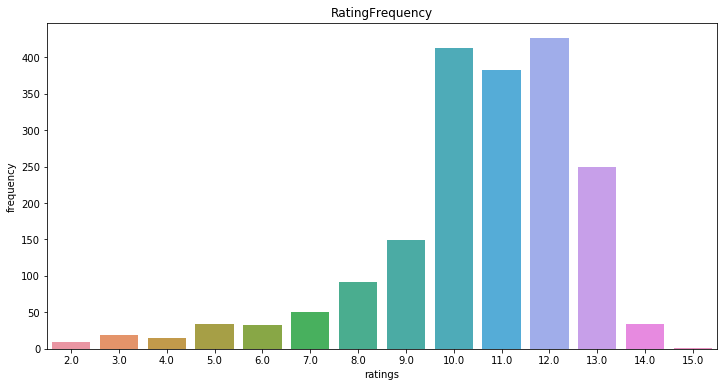

In [43]:
# Rates frequency in barplot
x = rates.index 
y = rates.values 
fig, ax = plt.subplots(figsize = (12, 6))
g = sns.barplot(x, y, ax=ax)
ax.set(xlabel= 'ratings', ylabel= 'frequency', title= 'RatingFrequency')
plt.show()

- The highest rating used is 12.0

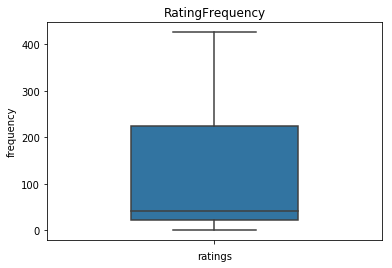

In [45]:
# Rates Frequency in boxplot
ax = sns.boxplot(rates, orient= 'v',width = .5)
ax.set(xlabel= 'ratings', ylabel= 'frequency', title= 'RatingFrequency')
plt.show()


In [65]:
highest_pred= df.groupby(['image_pred', 'confidence']).mean()
highest_pred

tweet_id  \
image_pred                     confidence                       
Afghan_hound                   0.123529    777885040357281792   
                               0.274637    832215726631055360   
                               0.903712    841314665196081152   
Airedale                       0.168762    669375718304980992   
                               0.305392    674075285688614912   
                               0.443004    673240798075449344   
                               0.448459    666835007768551424   
                               0.454239    808501579447930880   
                               0.495380    847251039262605312   
                               0.583122    678798276842360832   
                               0.602957    756275833623502848   
                               0.786089    778624900596654080   
                               0.868658    705066031337840640   
                               0.903832    679844490799091712   
                               0.945362    683498322573824000   
American_Staffordshire_terrier 0.215161    689275259254616064   
                               0.267695    668542336805281792   
                               0.463996    796759840936919040   
                               0.489845    797971864723324928   
                               0.523086    828376505180889088   
                               0.569501    700518061187723264   
                               0.599660    688789766343622656   
                               0.660085    837366284874571776   
                               0.810158    730573383004487680   
                               0.914978    677547928504967168   
                               0.919714    670815497391357952   
                               0.936662    828011680017821696   
Appenzeller                    0.341703    890971913173991424   
                               0.665628    696894894812565504   
Australian_terrier             0.207281    862831371563274240   
...                                                       ...   
toy_poodle                     0.827469    727314416056803328   
                               0.873841    767122157629476864   
                               0.880014    697270446429966336   
                               0.908491    707969809498152960   
                               0.912648    750868782890057728   
                               0.927975    674042553264685056   
                               0.966896    766313316352462848   
toy_terrier                    0.149680    666418789513326592   
                               0.776400    813066809284972544   
vizsla                         0.144012    780192070812196864   
                               0.259249    667177989038297088   
                               0.519589    675497103322386432   
                               0.657275    682393905736888320   
                               0.665516    674752233200820224   
                               0.743216    669942763794931712   
                               0.876413    693231807727280128   
                               0.911412    809084759137812480   
                               0.938617    806542213899489280   
                               0.960513    879008229531029504   
                               0.990391    737826014890496000   
whippet                        0.163794    753398408988139520   
                               0.178027    670385711116361728   
                               0.594701    682429480204398592   
                               0.601712    832032802820481024   
                               0.626152    889278841981685760   
                               0.734244    713177543487135744   
                               0.738371    707741517457260544   
                               0.877021    676603393314578432   
wire-haired_fox_terrier        0.155144    749317047558017024   
                       

In [66]:
df.confidence.describe()

count    1403.000000
mean        0.611358
std         0.260733
min         0.044333
25%         0.384373
50%         0.613819
75%         0.847139
max         0.999956
Name: confidence, dtype: float64

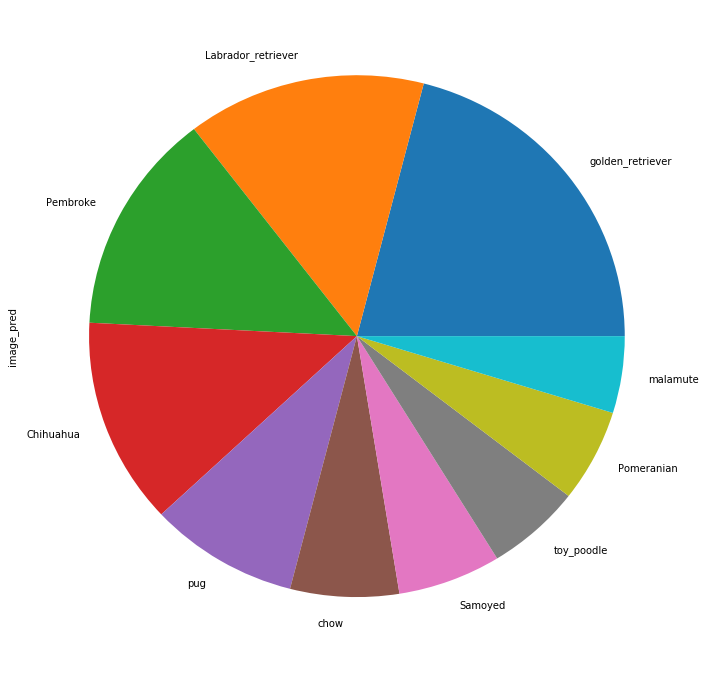

In [43]:
df['image_pred'].value_counts().sort_values(ascending = False).head(10).plot(kind='pie', figsize=(12,12))

In [36]:
df.image_pred.sort_values(ascending = False).head(10)

463     wire-haired_fox_terrier
706     wire-haired_fox_terrier
1684                    whippet
250                     whippet
15                      whippet
964                     whippet
669                     whippet
1399                    whippet
908                     whippet
1272                    whippet
Name: image_pred, dtype: object

In [90]:
df.image_pred.value_counts().sort_values(ascending = False).head(10)

golden_retriever      128
Labrador_retriever     88
Pembroke               84
Chihuahua              78
pug                    55
chow                   40
Samoyed                38
toy_poodle             35
Pomeranian             35
malamute               29
Name: image_pred, dtype: int64

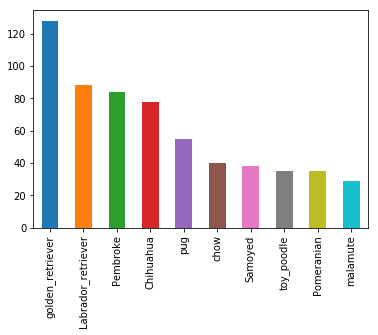

In [41]:
df.image_pred.value_counts().sort_values(ascending = False).head(10).plot(kind='bar')

- From the charts above we see that the (golden_retriver) is the most predicted image , and (labrador_retriver) is next 

In [89]:
stage= df.groupby('dog_stage').count()['favorite_count']
stage

dog_stage
doggo              59
doggo, floofer      1
doggo, pupper       9
doggo, puppo        1
floofer             7
pupper            194
puppo              19
Name: favorite_count, dtype: int64

[Text(0,0.5,'dod_stage'),
 Text(0.5,0,'count'),
 Text(0.5,1,'Most Favourite Dog')]

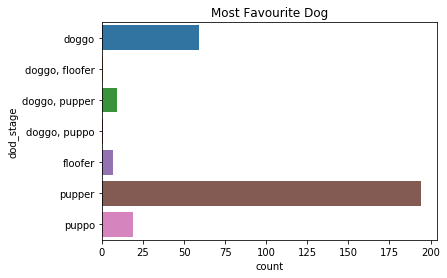

In [54]:
stage= df.groupby('dog_stage').count()['favorite_count']
a = sns.barplot(y= stage.index,x= stage.values)
a.set(xlabel= 'count', ylabel= 'dod_stage', title= 'Most Favourite Dog')

- The pupper has the most favourite in the data set 

[Text(0,0.5,'Favourite count'),
 Text(0.5,0,'Retweet count'),
 Text(0.5,1,'Retweet&Favourite Relation')]

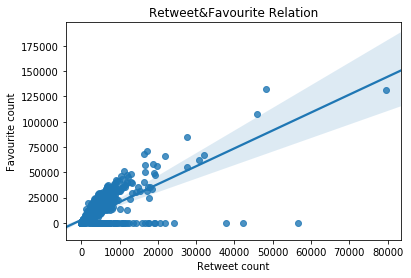

In [80]:
a = sns.regplot(x= 'retweet_count', y='favorite_count', data= df)
a.set(xlabel= 'Retweet count', ylabel= 'Favourite count', title= 'Retweet&Favourite Relation')

- Retweets and Favourites are positive correlated

In [86]:
df['name'].value_counts().sort_values(ascending = False).head(10)

Lucy       10
Charlie    10
Tucker      9
Cooper      9
Penny       9
Oliver      9
Sadie       8
Winston     7
Daisy       7
Toby        7
Name: name, dtype: int64

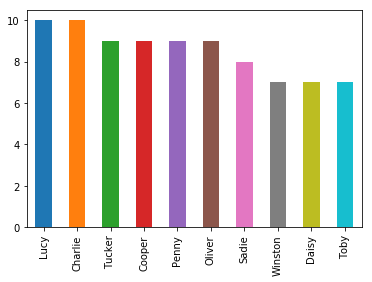

In [87]:
df['name'].value_counts().sort_values(ascending = False).head(10).plot(kind='bar')

- Most used Dog name is (Lucy and Charlie)